## SVM Implementation Using Pegasos
- <b><i>Formulating SVM as Unconstrainted Optimization Problem</i></b>

- paper:Pegasos: Primal Estimated sub-GrAdient SOlver for SVM<br/><b>The Final SVM Objective we Derived was-</b> <br/>
L(w) = $$L(w)=\frac{1}{2}w^Tw + c\sum_{i=1}^\infty max(0,1-t_i)$$<br/>
where,$$t_i=y^i(w^Tx^i+b)$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

In [4]:
print(Y) # but since we want out two classses to be 1 and -1 as we have derved all of our formulas accoridingly

[0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0]


In [5]:
# convert Y-labels into {1,-1}
Y[Y==0] = -1 # its again an application of broadcasting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

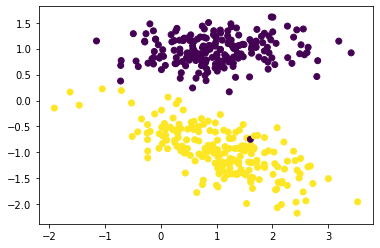

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [7]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        
        loss += 0.5*np.dot(W,W.T)
        
        m = X.shape[0] ## m->total number of examples
        
        for i in range(m):
            #ti = Y[i]*(np.dot(W,X[i].T)+b)# we took the transpose of X[i] beacuse we wanted its matrix multiplication with the matrix W
            ti = Y[i]*(np.dot(W,X[i])+b)
            loss += self.C*max(0,(1-ti))
        return loss[0][0]
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr = 300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #initialize the model parameters
        W = np.zeros((1,no_of_features)) # we can also do like W = np.zeros((no_of_features,1))
        bias = 0
        print(self.hingeLoss(W,bias,X,Y))
        
        # Training from here
        # Weight and bias update rule that we discussed!
        losses = [] # array of losses , so that later we can check whether we were able to reduce the loss or not
        
        for i in range(maxItr):
            #Training loop
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
             
            ids = np.arange(no_of_samples) # taking ids for examples in dataset ie each id corresponds to a example in dataset 
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                # Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                # iterate over all the examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                #Gradient for the batch is ready! Update W(weight),B(bias)
                W = W - n*W + n*gradw
                bias = bias + n*gradb
            
        self.W = W
        self.b = bias
        return W,bias,losses
                    
                      
            

In [19]:
#creating an object of class svm
mySVM = SVM()
#mySVM = SVM(1000)
W,b,losses = mySVM.fit(X,Y,maxItr = 100)
print(losses[0])
print(losses[-1])

400.0
400.0
14.940069991514045


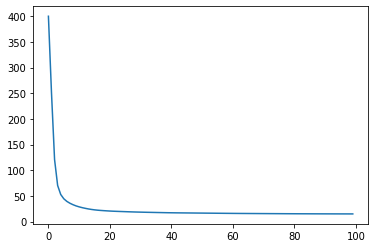

In [9]:
plt.plot(losses)
plt.show()

In [17]:
W,B = mySVM.W,mySVM.b
print(W,B)

[[ -9.53460529 -34.33945484]] 5.0


In [11]:
def plotHyperPlane(w1,w2,b):
    
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10) # taking dummy data for x_1 so that we can get the values ofr x2 to get a hyperplane
    x_2 = -(w1*x_1+b)/w2
    
    x_p = -(w1*x_1+b+1)/w2 #positive hyperplane->as we know that for the positive hyperplane we need to add 1 to the bias
    x_n = -(w1*x_1+b-1)/w2 #negative hyperplane->as we know for the negative hyperplane we need to subtract 1 from the bias
    
    plt.plot(x_1,x_2,label = "HyperPlane WX+B+=0") #plotting the main hyperplane
    plt.plot(x_1,x_p,'r--',label = "+ve HyperPlane WX+B+=1") #plotting the positive hyperplane
    plt.plot(x_1,x_n,'g--',label = "-ve HyperPlane WX+B+=-1") #plotting the negative hyperplane
    plt.legend()
    
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
    

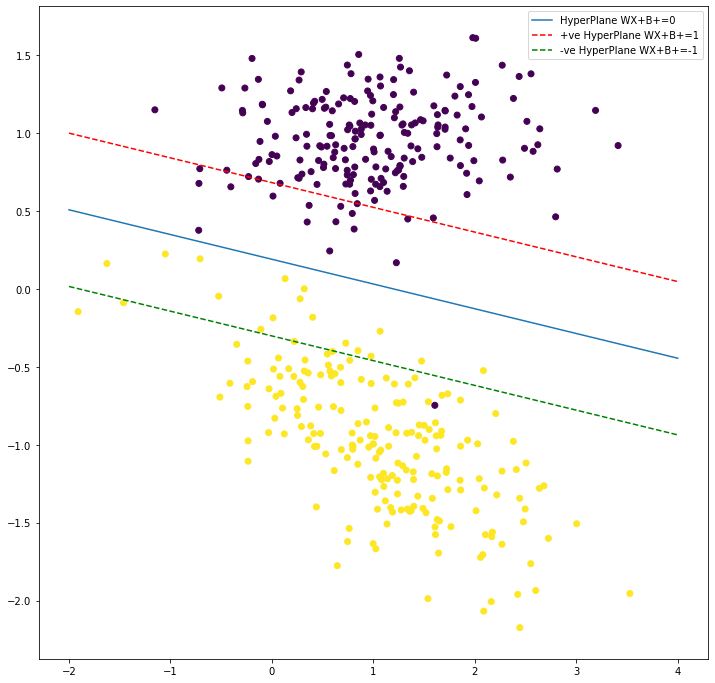

In [12]:
plotHyperPlane(W[0,0],W[0,1],B)

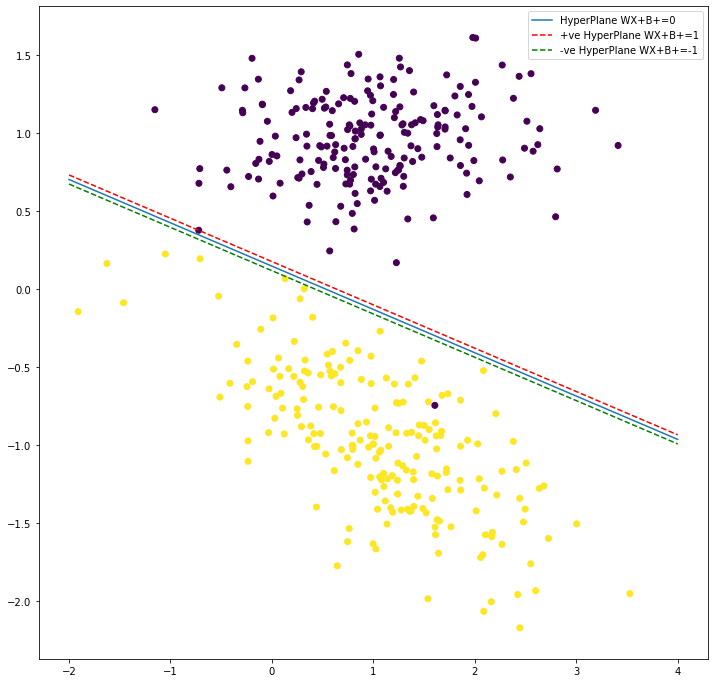

In [18]:
# plot for the case if we increase the value of penality constant to 1000 ie C = 1000
plotHyperPlane(W[0,0],W[0,1],B) # plot for the case when we increased the penality constant to a very high value like 1000, 
# we can clearly observe that in this case hyperplane is trying to classify each and every point in
# its correct class,which ultimately results in reduced margin,leading to overfitting.So its giving a bad output. 

In [14]:
#ids = np.arange(100)
#np.random.shuffle(ids)
#print(ids)


In [15]:
#print(X.shape)